# 게시글에 대한 좋아요 수를 분석해보자. 

In [1]:
import pandas as pd
import numpy as np
import datetime as dt

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# matplotlib 한글 깨짐 해결
plt.rcParams['font.family'] = 'AppleGothic' # For MacOS
plt.rcParams['axes.unicode_minus'] =False

# Seaborn 폰트 설정
sns.set(font='AppleGothic') # 사용하고 있는 한글 폰트로 변경

print(plt.rcParams['font.family'])

['AppleGothic']


In [2]:
df = pd.read_csv('../data/everytime_crawling_all.csv')
df

,날짜,좋아요,내용
0,36분 전,12,덕설이 ㄹㅇ 앙큼하고 사람같은 점:아까 논술고사 끝나구 학생들 나오기 시작하니까 갑...
1,49분 전,0,학교 20분 거리면 닥 도서관 가서 공부?아님 안 씻고 집에서 공부?
2,2022-11-27 9:53,0,도서관 왔는데 오자마자 집 가고싶어지는거 어쩔... 왤케 힘이 없지
3,2022-11-26 17:00,109,학교 왔다 현수막 봤는데 개길어ㅋㅋㅋ태어나서 본 현수막중 제일 장대한 길이를 자랑함...
4,2022-11-26 15:56,5,종로캠 들어가는거 이제 도서관 모바일 학생증으로 통일하기로 했대 가 볼 사람 참고해...
...,...,...,...
2393,2017-08-18 14:26,0,동덕다니는 애한테 학벌로 까이면 뭐라고 답해야 함?
2394,2017-05-02 12:40,1,"우리 고홍즈 하자,,, 나 동덕다니냐는 소리 지겨워ㅜㅜㅜ"
2395,2017-03-01 1:57,0,어이가없어서 잠도안와서 글쓰는데 ㅋㅋㅋㅋ내친구 동덕다니는데 오늘 연대애들이랑 3대 ...
2396,2017-01-29 19:55,2,아니 지가 15만원정도 되는 덕다운 추천해달래서누가 15만원으로 덕다운 살수 있는게...


# 좋아요 수 분석

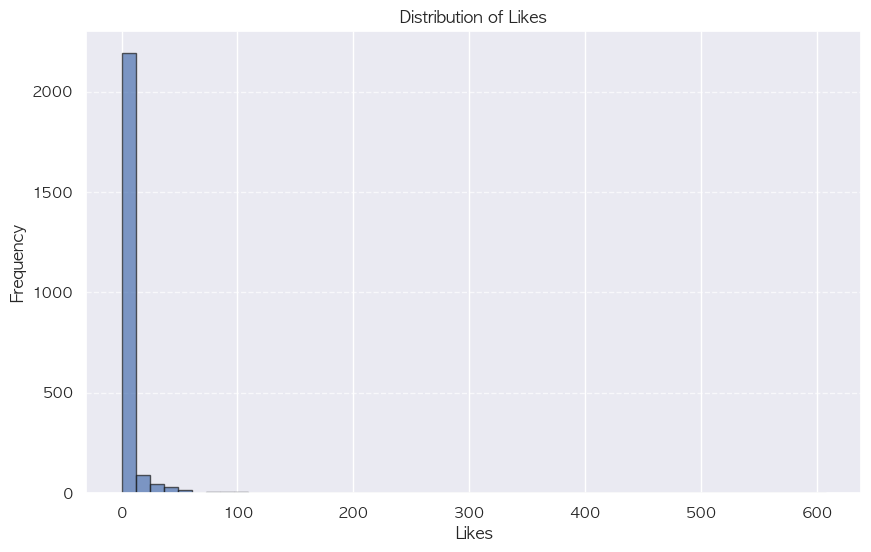

In [3]:
plt.figure(figsize=(10, 6))
plt.hist(df['좋아요'], bins=50, edgecolor='k', alpha=0.7)
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

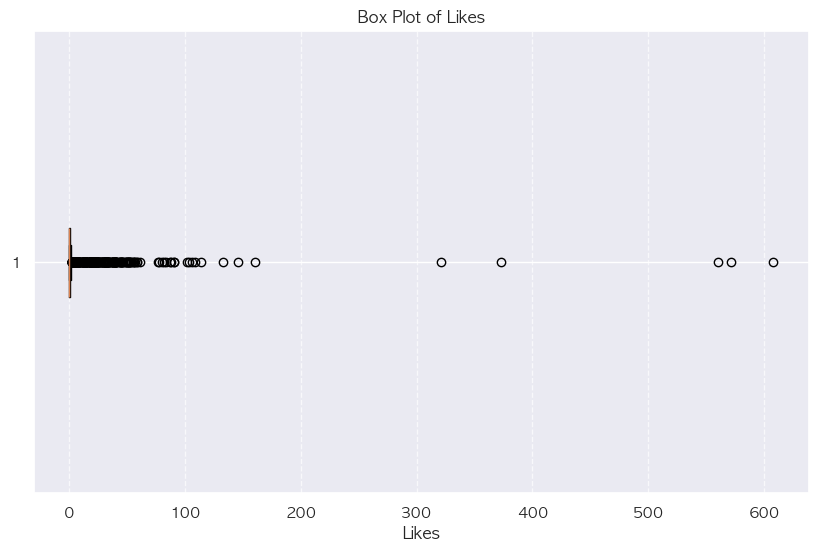

In [4]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['좋아요'], vert=False)
plt.title('Box Plot of Likes')
plt.xlabel('Likes')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


해당 데이터의 대부분은 좋아요 수가 0개이다. 

## 주요 키워드가 존재하는 게시글

In [5]:
# 주요 키워드
keywords = ['자리', '노트북', '이용', '발권', '반납']

# 키워드가 존재하는 게시글
filtered_df = df[df['내용'].apply(lambda x: any(keyword in x for keyword in keywords))]
filtered_df

,날짜,좋아요,내용
0,36분 전,12,덕설이 ㄹㅇ 앙큼하고 사람같은 점:아까 논술고사 끝나구 학생들 나오기 시작하니까 갑...
5,2022-11-26 15:23,0,덕우들 도서관에서 빌린 책 28일에 반납 예정인데 기간 연장할 수 있어?
17,2022-11-25 2:05,0,도서관에서 과제하고 싶은데 엘지그램 키스킨x면 아무래도 에바지? 노트북존에서 사용하...
18,2022-11-24 22:03,0,도서관 1층 대출 반납쪽에 있는 선생님 중 한분 나만 불친절하다고 느끼나...
20,2022-11-24 13:16,0,도서관 3층 독서실?자리는 예약 어떻게 해?
...,...,...,...
2361,2022-10-19 10:28,4,덕다 아침에 자리 맡아놓고 수업 다 갔다가 밤에 사람 젤많은 피크일 때 돌아오는 거...
2364,2022-10-18 21:49,1,진짜 너무한다 덕다 개방형 자리에 짐 두고 나간지 개오래 됐는데 한 번을 안오네 ㅋ...
2368,2022-10-17 20:47,0,덕다 꼭 써야하면 미발권으로 그냥 앉아있다가 누구 오면 비켜주는게 차라리 낫다 걍....
2369,2022-10-17 19:11,3,덕다 몇시간동안 비어있는거 지켜봤고 정황상 미반납이라 발권 안 되는 거 같은 자리면...


In [6]:
# 키워드가 존재하지 않는 게시글
non_filtered_df = df[~df['내용'].apply(lambda x: any(keyword in x for keyword in keywords))]
non_filtered_df

,날짜,좋아요,내용
1,49분 전,0,학교 20분 거리면 닥 도서관 가서 공부?아님 안 씻고 집에서 공부?
2,2022-11-27 9:53,0,도서관 왔는데 오자마자 집 가고싶어지는거 어쩔... 왤케 힘이 없지
3,2022-11-26 17:00,109,학교 왔다 현수막 봤는데 개길어ㅋㅋㅋ태어나서 본 현수막중 제일 장대한 길이를 자랑함...
4,2022-11-26 15:56,5,종로캠 들어가는거 이제 도서관 모바일 학생증으로 통일하기로 했대 가 볼 사람 참고해...
6,2022-11-26 14:57,1,나 너무 그냥 공부 때문에 스트레스 받아그렇다고 공부 잘하는 것도 아니고그냥 공부 ...
...,...,...,...
2393,2017-08-18 14:26,0,동덕다니는 애한테 학벌로 까이면 뭐라고 답해야 함?
2394,2017-05-02 12:40,1,"우리 고홍즈 하자,,, 나 동덕다니냐는 소리 지겨워ㅜㅜㅜ"
2395,2017-03-01 1:57,0,어이가없어서 잠도안와서 글쓰는데 ㅋㅋㅋㅋ내친구 동덕다니는데 오늘 연대애들이랑 3대 ...
2396,2017-01-29 19:55,2,아니 지가 15만원정도 되는 덕다운 추천해달래서누가 15만원으로 덕다운 살수 있는게...


### 키워드에 따른 좋아요 수 비교

In [7]:
# 평균 좋아요 수
overall_avg_likes = df['좋아요'].mean()

keyword_avg_likes = {keyword: df[df['내용'].str.contains(keyword)]['좋아요'].mean() for keyword in keywords}

avg_likes_df = pd.DataFrame(list(keyword_avg_likes.items()), columns=['Keyword', 'Average Likes'])
avg_likes_df['Overall Average Likes'] = overall_avg_likes
avg_likes_df

,Keyword,Average Likes,Overall Average Likes
0,자리,3.701299,4.511676
1,노트북,3.715789,4.511676
2,이용,6.926606,4.511676
3,발권,2.198020,4.511676
4,반납,9.260870,4.511676


In [8]:
# google spread sheets 상에서 그래프로 그려보기 위해 CSV 파일로 저장
# avg_likes_df.to_csv('../data/visualization/avg_likes_df.csv', index=False, encoding='utf-8-sig')

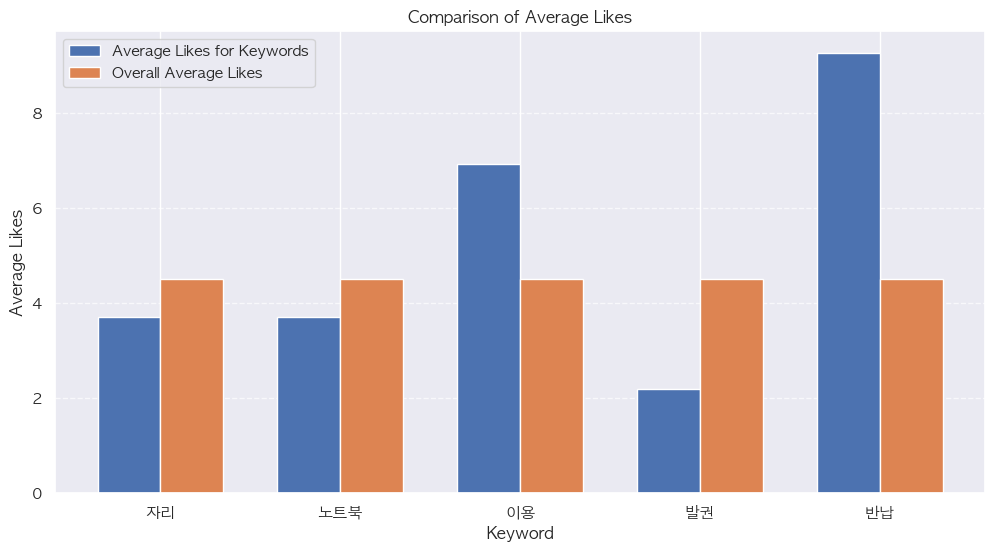

In [9]:
# 시각화
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(avg_likes_df))

plt.bar(index, avg_likes_df['Average Likes'], bar_width, label='Average Likes for Keywords')
plt.bar([i + bar_width for i in index], avg_likes_df['Overall Average Likes'], bar_width, label='Overall Average Likes')

plt.xlabel('Keyword')
plt.ylabel('Average Likes')
plt.title('Comparison of Average Likes')
plt.xticks([i + bar_width / 2 for i in index], avg_likes_df['Keyword'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

이용, 반납에 관한 게시글에 평균 좋아요 수가 더 많다. 

좋아요 수가 존재하는 게시글 중 키워드에 따른 좋아요 수를 비교해보자. 

In [10]:
df_test = df[df['좋아요'] >= 1]
overall_avg_likes = df_test['좋아요'].mean()

keyword_avg_likes = {keyword: df_test[df_test['내용'].str.contains(keyword)]['좋아요'].mean() for keyword in keywords}

avg_likes_df = pd.DataFrame(list(keyword_avg_likes.items()), columns=['Keyword', 'Average Likes'])
avg_likes_df['Overall Average Likes'] = overall_avg_likes
avg_likes_df

,Keyword,Average Likes,Overall Average Likes
0,자리,12.761194,16.984301
1,노트북,22.062500,16.984301
2,이용,17.976190,16.984301
3,발권,10.571429,16.984301
4,반납,20.285714,16.984301


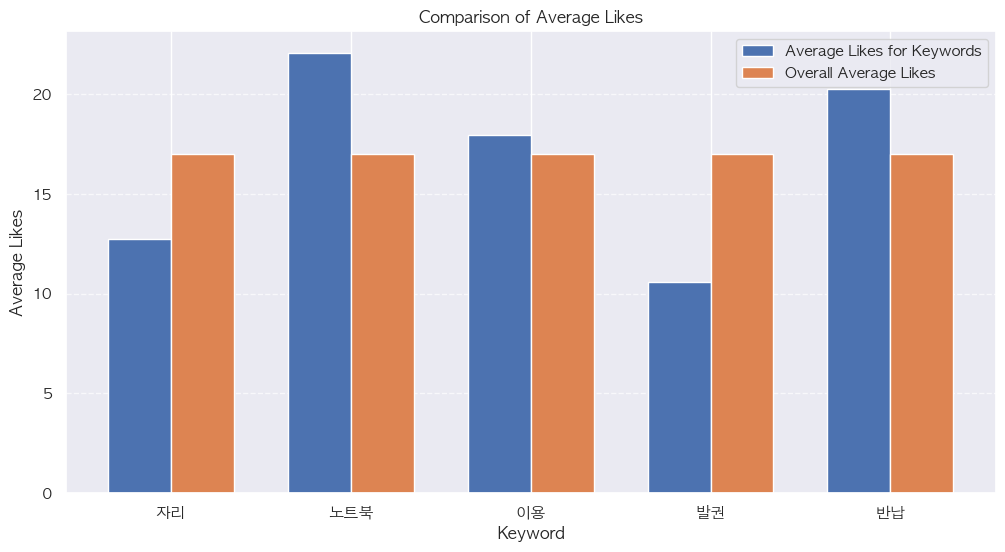

In [11]:
# 시각화
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(avg_likes_df))

plt.bar(index, avg_likes_df['Average Likes'], bar_width, label='Average Likes for Keywords')
plt.bar([i + bar_width for i in index], avg_likes_df['Overall Average Likes'], bar_width, label='Overall Average Likes')

plt.xlabel('Keyword')
plt.ylabel('Average Likes')
plt.title('Comparison of Average Likes')
plt.xticks([i + bar_width / 2 for i in index], avg_likes_df['Keyword'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

위와 비슷하게 노트북, 반납에 관한 게시글에 평균 좋아요 수가 더 많다. 

In [12]:
# 좋아요 수가 존재하며, 100 이하인 게시글 들만 필터링
df_test = df[(df['좋아요'] >= 1) & (df['좋아요'] <= 100)]
overall_avg_likes = df_test['좋아요'].mean()

keyword_avg_likes = {keyword: df_test[df_test['내용'].str.contains(keyword)]['좋아요'].mean() for keyword in keywords}

avg_likes_df = pd.DataFrame(list(keyword_avg_likes.items()), columns=['Keyword', 'Average Likes'])
avg_likes_df['Overall Average Likes'] = overall_avg_likes
avg_likes_df

,Keyword,Average Likes,Overall Average Likes
0,자리,11.227273,11.876603
1,노트북,16.600000,11.876603
2,이용,15.634146,11.876603
3,발권,5.400000,11.876603
4,반납,10.425000,11.876603


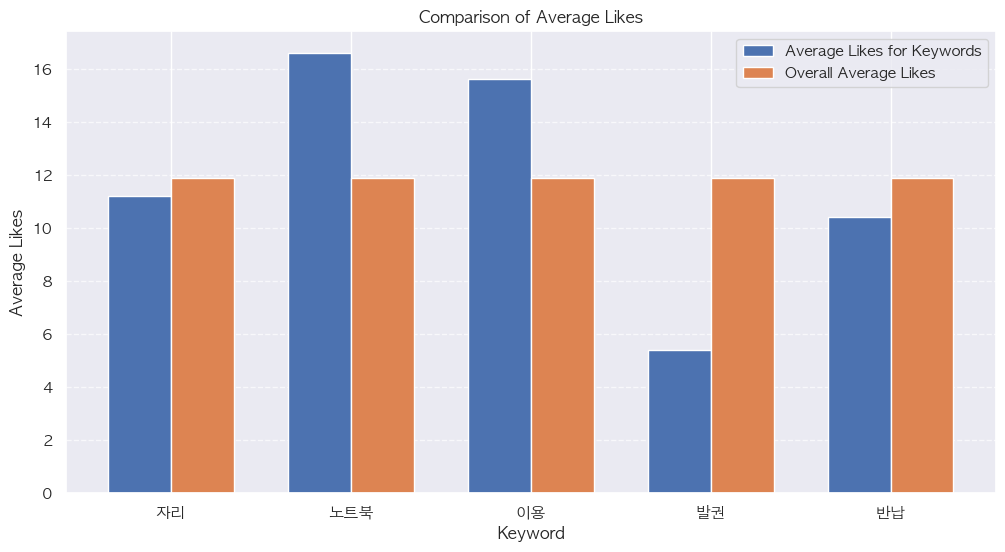

In [13]:
# 시각화
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(avg_likes_df))

plt.bar(index, avg_likes_df['Average Likes'], bar_width, label='Average Likes for Keywords')
plt.bar([i + bar_width for i in index], avg_likes_df['Overall Average Likes'], bar_width, label='Overall Average Likes')

plt.xlabel('Keyword')
plt.ylabel('Average Likes')
plt.title('Comparison of Average Likes')
plt.xticks([i + bar_width / 2 for i in index], avg_likes_df['Keyword'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

노트북, 이용 관련 게시글에 평균 좋아요 수가 더 많다. 

### 좋아요 수의 이상치를 제거해서 확인해보자. 

In [14]:
# 이상치 제거 함수
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

In [15]:
df_test = remove_outliers_iqr(df, '좋아요')
overall_avg_likes = df_test['좋아요'].mean()

keyword_avg_likes = {keyword: df_test[df_test['내용'].str.contains(keyword)]['좋아요'].mean() for keyword in keywords}

avg_likes_df = pd.DataFrame(list(keyword_avg_likes.items()), columns=['Keyword', 'Average Likes'])
avg_likes_df['Overall Average Likes'] = overall_avg_likes
avg_likes_df

,Keyword,Average Likes,Overall Average Likes
0,자리,0.160428,0.166584
1,노트북,0.048193,0.166584
2,이용,0.283951,0.166584
3,발권,0.147727,0.166584
4,반납,0.312500,0.166584


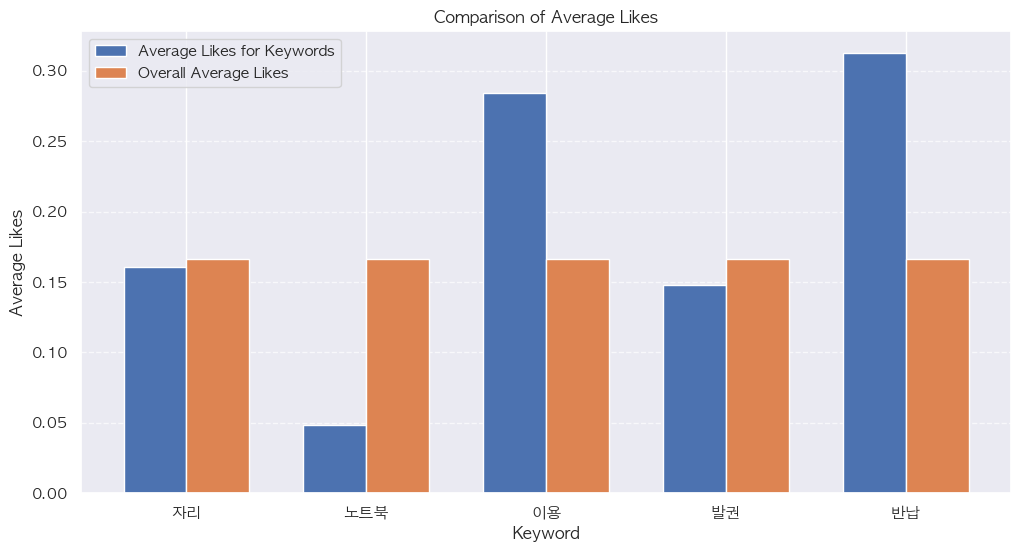

In [16]:
# 시각화
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = range(len(avg_likes_df))

plt.bar(index, avg_likes_df['Average Likes'], bar_width, label='Average Likes for Keywords')
plt.bar([i + bar_width for i in index], avg_likes_df['Overall Average Likes'], bar_width, label='Overall Average Likes')

plt.xlabel('Keyword')
plt.ylabel('Average Likes')
plt.title('Comparison of Average Likes')
plt.xticks([i + bar_width / 2 for i in index], avg_likes_df['Keyword'])
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

유사하게 이용, 반납에 관한 게시글에 평균 좋아요 수가 더 많다. 